In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from scipy.interpolate import interp1d


%matplotlib widget

In [44]:
# load and clean data
input_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc0104_multi_v1_catalog-meth1.txt'
df = pd.read_csv(input_file, header=None, delim_whitespace=True, 
                   usecols=[0, 1, 2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32], 
                   names=['X','Y','F275W','rad_275','F336W','rad_336','F435W','rad_435','F606W','rad_606','F814W','rad_814','prob_member'], skiprows=55)

df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

In [45]:
# flag the data that are ok (membership probability and radxs)
# set the conditions
conditions = (
    (df['prob_member'] >= 90) & 
    (np.abs(df['rad_275']) < 0.2) &
    (np.abs(df['rad_336']) < 0.2) &
    (np.abs(df['rad_435']) < 0.2) &
    (np.abs(df['rad_606']) < 0.2) &
    (np.abs(df['rad_814']) < 0.2) 
    )   

# assign the flag 
df['flag'] = np.where(conditions, 1, 0)

In [46]:
# select the data with flag 1 
data = df[df['flag'] == 1]

In [47]:
test_stars = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/test_stars.csv', delim_whitespace=True)

In [48]:
fid = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/fiducial_275_814.csv')
hb = pd.read_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/HB_275_814.csv')

In [49]:
mags = [19.5, 19, 18.5, 18, 17.5, 17, 16.75, 16.5, 16.35, 16, 15.5, 15, 14.5, 14, 13.5, 13, 12.5, 12, 11.5, 11, 10.5, 10]
x_val = fid['x']
y_val = fid['y']

# interpolate
interp_func = interp1d(y_val, x_val, kind='linear', fill_value='extrapolate')
colors = interp_func(mags)

mags_2 = colors + mags

In [50]:
test_stars['F275W'] = mags_2
print(test_stars)

    F814W    F606W    F435W    F336W      F275W
0   19.50  20.3826  21.7230  22.5073  25.077929
1   19.00  19.7576  20.8966  21.3260  23.553463
2   18.50  19.1648  20.1414  20.2540  21.963334
3   18.00  18.5927  19.4358  19.3551  20.706029
4   17.50  18.0533  18.8103  18.6448  19.713172
5   17.00  17.5349  18.2610  18.0684  19.069963
6   16.75  17.2905  18.0209  17.8631  18.865403
7   16.50  17.0687  17.8663  17.7906  18.863294
8   16.35  16.9772  17.8608  17.9633  19.277143
9   16.00  16.6764  17.6788  17.9198  19.558846
10  15.50  16.2005  17.2369  17.5239  19.260239
11  15.00  15.7099  16.7797  17.1372  18.902348
12  14.50  15.2327  16.3343  16.7795  18.631368
13  14.00  14.7533  15.9051  16.4302  18.451538
14  13.50  14.2766  15.4969  16.1349  18.301762
15  13.00  13.8076  15.0902  15.8800  18.210262
16  12.50  13.3640  14.7510  15.7359  18.420647
17  12.00  12.9152  14.4318  15.6264  18.501400
18  11.50  12.4725  14.0987  15.5233  18.659534
19  11.00  12.0538  13.8674  15.5896  18

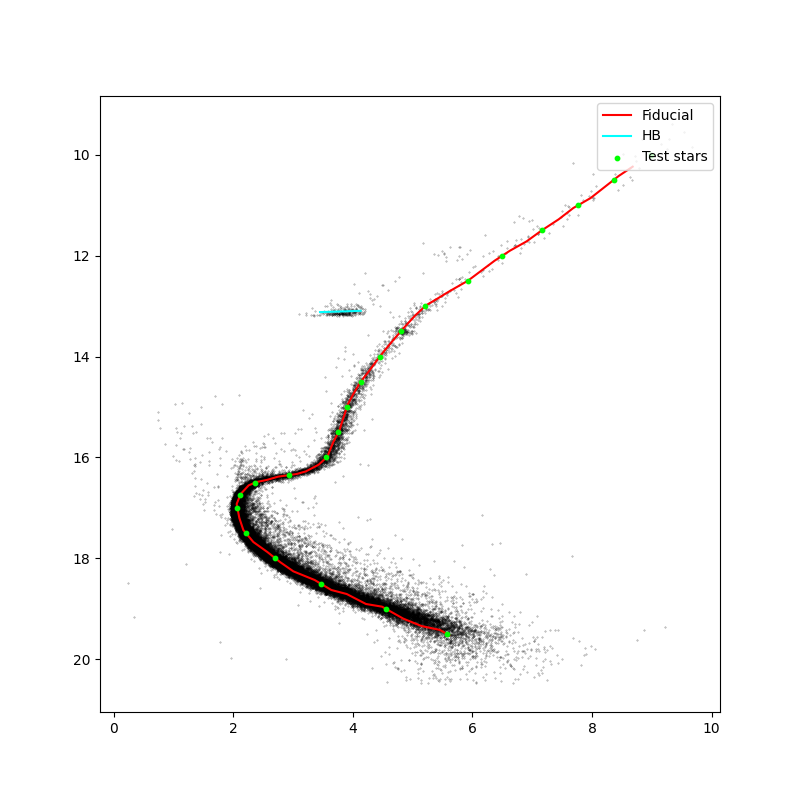

In [51]:
fig = plt.figure(figsize=(8,8))
plt.scatter(data['F275W']-data['F814W'], data['F814W'], 
            s=0.1, alpha=0.5, c='black', zorder=1)
plt.plot(fid['x'], fid['y'], c='red', linewidth=1.5, label='Fiducial', zorder=2)
plt.plot(hb['x'], hb['y'], c='cyan', linewidth=1.5, label='HB', zorder=3)
plt.scatter(test_stars['F275W']-test_stars['F814W'], test_stars['F814W'], 
            s=10, c='lime', label='Test stars', zorder=4)
plt.gca().invert_yaxis()

plt.legend(loc='upper right')

plt.show()

In [52]:
#test_stars.to_csv('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/test_stars.csv', index=False, float_format='%.4f', sep=' ')